In [50]:
pip install tensorflow


You should consider upgrading via the '/Users/fukasakai/Hack-1_2025/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [51]:
pip install matplotlib

You should consider upgrading via the '/Users/fukasakai/Hack-1_2025/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [52]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os


In [53]:
image_size = (180, 180)
batch_size = 32
#クラス数は、データセットのサブディレクトリの数に基づいて自動的に決定されます。
train_ds = tf.keras.utils.image_dataset_from_directory(
    #これは、データセットのディレクトリを指定します。
  "/Users/fukasakai/Hack-1_2025/gazou_bunnrui",
  #データセットのディレクトリは、画像がサブディレクトリに分類されている必要があります。
  validation_split=0.2,
  subset="training",
  #データセットの分割を指定します。ここでは、80%をトレーニング用、20%を検証用に使用します。
  #ランダムなシードを指定します。これにより、データセットの分割が再現可能になります。
  seed=123,
  image_size=image_size,  #画像のサイズを指定します。ここでは、180x180ピクセルにリサイズされます。
  #画像のサイズを指定します。ここでは、180x180ピクセルにリサイズされます。
  #バッチサイズを指定します。ここでは、32枚の画像を1つのバッチとして処理します。
  #バッチサイズを指定します。ここでは、32枚の画像を1つのバッチとして処理します。
  batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
  #データセットのディレクトリを指定します。
  "/Users/fukasakai/Hack-1_2025/gazou_bunnrui", 
  #データセットのディレクトリは、画像がサブディレクトリに分類されている必要があります。
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=image_size,
  batch_size=batch_size
)


Found 100 files belonging to 5 classes.
Using 80 files for training.
Found 100 files belonging to 5 classes.
Using 20 files for validation.


In [54]:
model = models.Sequential([
  layers.Rescaling(1./255, input_shape=(180, 180, 3)),# 画像のピクセル値を0-1にスケーリング　#input_shape=(180, 180, 3)これは、入力画像の形状を指定します。180x180ピクセル、3チャンネル（RGB）です。
  # 画像のピクセル値を0-1にスケーリングします。
  layers.Conv2D(16, 3, padding='same', activation='relu'),# 畳み込み層を追加します。16個のフィルター、3x3のカーネルサイズ、パディングは'same'、活性化関数はReLUです。
  layers.MaxPooling2D(),# プーリング層を追加します。プーリングサイズはデフォルトの2x2です。
  layers.Conv2D(32, 3, padding='same', activation='relu'),# 畳み込み層を追加します。32個のフィルター、3x3のカーネルサイズ、パディングは'same'、活性化関数はReLUです。
  layers.MaxPooling2D(),# プーリング層を追加します。プーリングサイズはデフォルトの2x2です。
  layers.Conv2D(64, 3, padding='same', activation='relu'),# 畳み込み層を追加します。64個のフィルター、3x3のカーネルサイズ、パディングは'same'、活性化関数はReLUです。
  layers.MaxPooling2D(),# プーリング層を追加します。プーリングサイズはデフォルトの2x2です。
  layers.Flatten(),# 畳み込み層の出力を1次元に変換します。
  layers.Dense(128, activation='relu'),# 全結合層を追加します。128ユニット、活性化関数はReLUです。
  layers.Dense(5)# クラス数に合わせて変更# 出力層を追加します。クラス数は3です（例：猫、犬、鳥など）。
])


/Users/fukasakai/Hack-1_2025/.venv/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [55]:
model.compile(optimizer='adam',# オプティマイザをAdamに設定します。
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),# 損失関数をSparseCategoricalCrossentropyに設定します。from_logits=Trueは、出力がロジットであることを示します。
              
              metrics=['accuracy'])# 評価指標として精度を使用します。

history = model.fit(# モデルをトレーニングします。
  train_ds,# トレーニングデータセットを指定します。
  validation_data=val_ds,# 検証データセットを指定します。
  epochs=10# エポック数を10に設定します。
)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 610ms/step - accuracy: 0.1961 - loss: 1.9794 - val_accuracy: 0.3500 - val_loss: 1.8938
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 514ms/step - accuracy: 0.4180 - loss: 1.6024 - val_accuracy: 0.3000 - val_loss: 1.4319
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 537ms/step - accuracy: 0.5328 - loss: 1.3181 - val_accuracy: 0.4000 - val_loss: 1.4039
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 371ms/step - accuracy: 0.3773 - loss: 1.2458 - val_accuracy: 0.1500 - val_loss: 1.4060
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 757ms/step - accuracy: 0.5727 - loss: 1.1374 - val_accuracy: 0.4000 - val_loss: 1.3065
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 791ms/step - accuracy: 0.8687 - loss: 1.0079 - val_accuracy: 0.4000 - val_loss: 1.3694
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 484ms/step - accuracy: 0.8125 - loss: 0.8595 - val_accuracy: 0.5500 - val_loss: 1.2710
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 463ms/step - accuracy: 0.8117 - loss: 0.7084 - val_accuracy: 0.3500 - val_loss:

In [56]:
model.export("my_model")  # 通常保存


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Saved artifact at 'my_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name='keras_tensor_44')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  4542458944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  4542384608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  4542389712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  4542383200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  4542396928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  4542387248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  4542382848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  4542397456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  4542385840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  4497340576: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [57]:
converter = tf.lite.TFLiteConverter.from_saved_model("my_model")# TFLiteConverterを使用して、保存されたモデルをTFLite形式に変換します。
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # 最適化を有効にします。
converter.target_spec.supported_types = [tf.float16]  # 出力のデータ型をfloat16に設定します。
# TFLiteConverterを使用して、保存されたモデルをTFLite形式に変換します。
tflite_model = converter.convert()  # モデルをTFLite形式に変換します。

with open("model.tflite", "wb") as f:# 変換されたTFLiteモデルをファイルに保存します。
  # ファイル名を指定して、バイナリモードで開きます。
    f.write(tflite_model)


W0000 00:00:1748842005.989064 24007119 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1748842005.989398 24007119 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-06-02 14:26:45.989891: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: my_model
2025-06-02 14:26:45.990995: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-06-02 14:26:45.991006: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: my_model
2025-06-02 14:26:46.001297: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-06-02 14:26:46.076910: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: my_model
2025-06-02 14:26:46.096418: I tensorflow/cc/saved_model/loader.cc:471] SavedModel load for tags { serve }; Status: success: OK. Took 106528 microseconds.


In [58]:
from PIL import Image

# クラス名一覧を取得
class_names = train_ds.class_names
import numpy as np
# 画像を予測する関数    


def predict_image(img_path):
    img = Image.open(img_path).convert("RGB").resize(image_size)  # ← ここでRGBに変換
    img_array = np.array(img) 
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions)
    predicted_class = class_names[predicted_index]
    return predicted_class




In [59]:
result = predict_image("/Users/fukasakai/Hack-1_2025/test/t_curry.png")
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
curry


In [60]:
test_images = ["/Users/fukasakai/Hack-1_2025/test/t_curry.png", "/Users/fukasakai/Hack-1_2025/test/t_fried_rice.png", "/Users/fukasakai/Hack-1_2025/test/t_hamburg_steak.png"]

for img_path in test_images:
    result = predict_image(img_path)
    print(f"{img_path} => 推論結果: {result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
/Users/fukasakai/Hack-1_2025/test/t_curry.png => 推論結果: curry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
/Users/fukasakai/Hack-1_2025/test/t_fried_rice.png => 推論結果: fried_rice
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
/Users/fukasakai/Hack-1_2025/test/t_hamburg_steak.png => 推論結果: curry


/var/folders/6z/gq5d8mcj0_l_jfw25df7691h0000gn/T/ipykernel_45603/2361787619.py:23: UserWarning: Glyph 12456 (\N{KATAKANA LETTER E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6z/gq5d8mcj0_l_jfw25df7691h0000gn/T/ipykernel_45603/2361787619.py:23: UserWarning: Glyph 12509 (\N{KATAKANA LETTER PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6z/gq5d8mcj0_l_jfw25df7691h0000gn/T/ipykernel_45603/2361787619.py:23: UserWarning: Glyph 12483 (\N{KATAKANA LETTER SMALL TU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6z/gq5d8mcj0_l_jfw25df7691h0000gn/T/ipykernel_45603/2361787619.py:23: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6z/gq5d8mcj0_l_jfw25df7691h0000gn/T/ipykernel_45603/2361787619.py:23: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6z/gq5d8mcj0_l_jfw25df7691h0000gn/

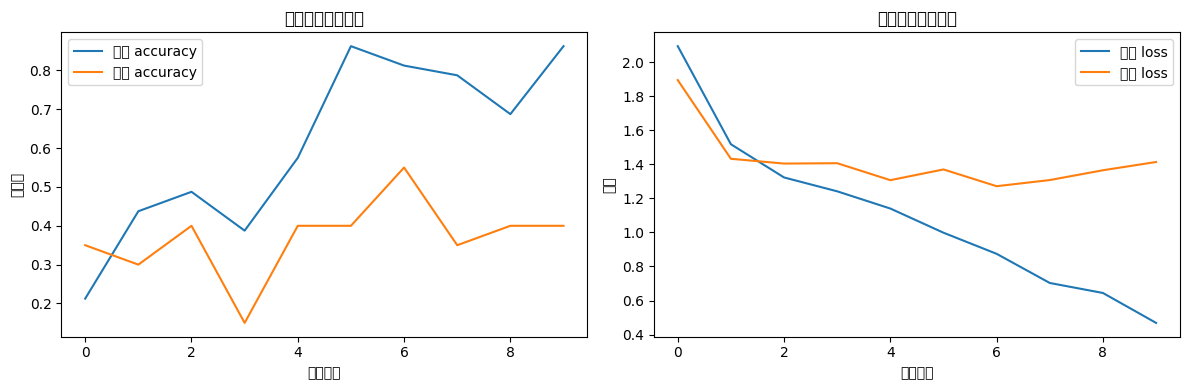

In [61]:
import matplotlib.pyplot as plt

# 精度（accuracy）をプロット
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='訓練 accuracy')
plt.plot(history.history['val_accuracy'], label='検証 accuracy')
plt.title('モデル精度の推移')
plt.xlabel('エポック')
plt.ylabel('正解率')
plt.legend()

# 損失（loss）をプロット
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='訓練 loss')
plt.plot(history.history['val_loss'], label='検証 loss')
plt.title('モデル損失の推移')
plt.xlabel('エポック')
plt.ylabel('損失')
plt.legend()

plt.tight_layout()
plt.show()


In [62]:
# 検証データセットで評価（またはテスト用に別途用意したデータセット）
loss, accuracy = model.evaluate(val_ds)

print(f"検証データに対する正解率: {accuracy:.4f}")  # 小数点4桁（例: 0.8750 = 87.5%）
print(f"検証データに対する損失: {loss:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.4000 - loss: 1.4131
検証データに対する正解率: 0.4000
検証データに対する損失: 1.4131


In [64]:
from PIL import Image
import numpy as np

# クラス名リスト（例）
class_names = train_ds.class_names  # ['hamburg', 'curry', 'sushi', ...]

# 正解データ（img_pathとその正解クラス名）
test_data = [("/Users/fukasakai/Hack-1_2025/test/t_curry.png", "カレー"),("/Users/fukasakai/Hack-1_2025/test/t_fried_rice.png","チャーハン"),( "/Users/fukasakai/Hack-1_2025/test/t_hamburg_steak.png", "ハンバーグ")]
    

# 正解カウント
correct = 0

def predict_image(img_path):
    img = Image.open(img_path).convert("RGB").resize(image_size)
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions)
    predicted_class = class_names[predicted_index]
    return predicted_class

# 各画像で推論して正解チェック
for img_path, true_label in test_data:
    predicted = predict_image(img_path)
    print(f"{img_path} => 推論: {predicted}, 正解: {true_label}")
    if predicted == true_label:
        correct += 1

# 正解率を計算
accuracy = correct / len(test_data)
print(f"\n正解率: {accuracy:.2%}")

# コメント出力
if accuracy >= 0.7:
    print(f"{predicted}、美味しそうだね！")
else:
    print("それ美味しそうだね！")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
/Users/fukasakai/Hack-1_2025/test/t_curry.png => 推論: hamburger_steak, 正解: カレー
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
/Users/fukasakai/Hack-1_2025/test/t_fried_rice.png => 推論: hamburger_steak, 正解: チャーハン
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
/Users/fukasakai/Hack-1_2025/test/t_hamburg_steak.png => 推論: hamburger_steak, 正解: ハンバーグ

正解率: 0.00%
それ美味しそうだね！
